# Lab 2: Classification (Part 1)

## Name: Katherine Yun (myun7)

### Due January 30, 2019 11:59 PM [Next Wednesday]

#### Logistics and Lab Submission

See the [course website](https://courses.engr.illinois.edu/ece398bd/logisticslav.html).

#### What You Will Need To Know For This Lab

This lab covers some basic classifiers which can be used for M-ary classification.

- k-Nearest Neighbors
- Bayes Classifiers
- Linear Discriminant Analysis

There are some problems which have short answer questions. <b>Do not write an essay -- a few (1-2) complete sentences will suffice.</b>

<b>Also, be clear about your answers</b>. For example, if a question asks you "Which classifier would you choose?", be unequivocal about which classifier you would choose (and why); as engineers, part of your job is to make design decisions and justify them in comparison to the alternatives. 

#### Preamble (Don't change this)

In [3]:
%pylab inline
import numpy as np
import scipy.spatial.distance as dist
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Load the data needed for Problems 1-3 

# Read the data
traindata_tmp= genfromtxt('train.csv', delimiter=',')
valdata_tmp= genfromtxt('val.csv', delimiter=',')

#The data which you will use to train LDA and kNN is called "trainingdata"
trainingdata=traindata_tmp[:,:2]
#The corresponding labels are in "traininglabels"
traininglabels=traindata_tmp[:,2]

#The data which you will use to validate LDA, kNN and the Bayes Classifier
#is called "valdata"
valdata=valdata_tmp[:,:2]
#The corresponding labels are in "vallabels"
vallabels=valdata_tmp[:,2]


In [5]:
# Some code to visualize decision regions in Problem 1 to 3; you don't need to look at this
adp=np.vstack([trainingdata,valdata])
xmin,xmax = adp[:,0].min()-1, adp[:,0].max()+1
ymin,ymax = adp[:,0].min()-1, adp[:,0].max()+1
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.05),np.arange(ymin, ymax, 0.05))
drdata= np.c_[xx.ravel(), yy.ravel()]

#### Problem 1 : Bayes Classifiers (20 points + 5 bonus points)

In this section, you will implement a Bayes classifier for the following $M$-ary classification problem:

$$H_y: \mathbf{X} \sim \mathcal{N}(\mathbf{\mu}_y,{\sf C}) \qquad y=0,\ldots,M-1$$

i.e. the data is a $d$-dimensional Gaussian with a common covariance matrix $\sf C$ among all classes, but the means are different (and there is a prior among the classes). Remember, when the mean vectors, covariance matrix and prior probabilities are known, no classifier can do better than the Bayes classifier.

You will write a function which takes in 4 parameters:
* A set of data to classify (with rows as feature vectors) as a $(V,d)$ numpy.ndarray (data)
* A M-length vector with the prior probabilities of each class as a numpy.ndarray (pi)
* A matrix with rows giving the class means as a $(M,d)$ numpy.ndarray (means)
* The common covariance matrix as a $(d,d)$ numpy.ndarray (cov)

It will output a length $V$ numpy.ndarray of the outputs of the classifier (labels). You may not use scikit-learn or similar to implement this. Note that the class labels in this problem are $0,1,2$ (not $1,2,3$). Since Python uses zero-based indexing, this will allow you to avoid a few +1's in your code. 

<b>Note that there are 5 bonus points for not using loops in Problem 1.</b>

Some hints
* If you did lab 1, exercises 5 and 6, they will get you through the bulk of this problem.
* A non-exhaustive list of useful functions: numpy.linalg.inv, numpy.sum, numpy.log, numpy.argmax.
* You may use <a href="http://docs.scipy.org/doc/numpy-1.10.1/user/basics.broadcasting.html">broadcasting</a> to help simplify your code. The basic form you may want to use is, if you have code which says A + B where A is (n,m) and B is (m,) then numpy will automatically translate this to adding B to each row of A. 


A function prototype is provided below <b>(10 points)</b>:

In [6]:
def bayesClassifier(data,pi,means,cov):
    # Put your code here
    one = np.transpose(np.log(pi))
 
    two = np.dot(np.dot(means,np.linalg.inv(cov)),np.transpose(data))
    two = np.transpose(two)
    
    three = 1/2*np.dot(np.dot(means,np.linalg.inv(cov)),np.transpose(means))
    three = np.diag(three)
   
    obj_func = two + one - three
    
    labels = np.argmax(obj_func, axis = 1)
    
    return labels 

Now, you will write a function which calculates the error of a classifier using the $0,1$-loss by comparing the true labels and the predicted labels. 

The function will take in two parameters:
* A vector of length $N$ with the true labels as a numpy.ndarray (truelabels)
* A vector of length $N$ with the estimated labels as a numpy.ndarray (estimatedlabels)

The function will return the error (a scalar).

A function prototype is provided below <b>(5 points)</b>:

In [7]:
def classifierError(truelabels,estimatedlabels):
    # Put your code here
    wrong_num = np.sum(np.absolute(estimatedlabels - truelabels) > 0)
    error = wrong_num/estimatedlabels.size
    return error

Now, we will load some sample data, in the format specified above. 
We have three classes, with
$$\pi_0=\frac{1}{4}, \pi_1=\frac{1}{4}, \pi_2=\frac{1}{2}$$

$$\mathbf{\mu}_0=\begin{bmatrix} 1 \\ 5\end{bmatrix},\mathbf{\mu}_1=\begin{bmatrix} 5 \\ 0\end{bmatrix}, \mathbf{\mu}_2=\begin{bmatrix} -2\\-2\end{bmatrix} $$

$$\Sigma=\begin{bmatrix} 5 & 1 \\ 1 & 5 \end{bmatrix}$$


In [8]:
#The data which you will use to test the classifier is called "data"
data=np.copy(valdata)
#The labels are in "truelabels"
truelabels=np.copy(vallabels)

Let's visualize the data by class. Each class will be in a different color.

(-7.345781630824372, 11.62528163082437, -8.5409666004415, 12.0151666004415)

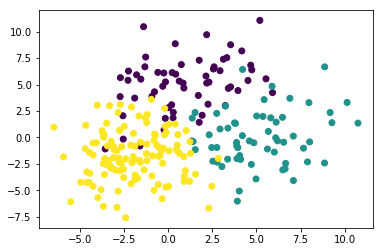

In [9]:
scatter(data[:,0], data[:,1], c=truelabels)
axis('tight')

Run the classifier on the data in `data` with labels `truelabels`. Store the predicted labels in a variable called `estimatedlabels` and report the classifier's error rate. Run the classifier on the data in `drdata` and store the labels outputted by the classifier into a variable called `drB`. We will use `drB` to help visualize the decision regions. <b>(5 points)</b>

In [10]:


# Put your code here. 
means = np.array([[1,5],[5,0], [-2,-2]])
pi = array([[1/4],[1/4],[1/2]])
cov = np.array([[5,1],[1,5]])
estimatedlabels = bayesClassifier(data, pi, means, cov)
error = classifierError(truelabels, estimatedlabels)

print("classifierError: ",error)

drB = bayesClassifier(drdata, pi, means, cov)

classifierError:  0.09583333333333334


#### Answer: the classifier error is 9.58333%

Now, lets visualize the output of our classifier. 

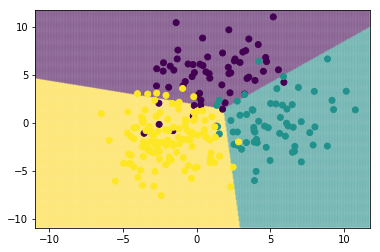

In [12]:
pcolormesh(xx,yy,drB.reshape(xx.shape),alpha=0.1,antialiased=True)
axis('tight')
scatter(data[:,0],data[:,1],c=truelabels)

You should observe linear boundaries between the decision regions and almost all the points are in the correct region for this problem. 

#### Problem 2 : Linear Discriminant Analysis (25 points)

In this problem, you will implement Linear Discriminant Analysis (LDA). You will use the Bayes classifier from Problem 1 to do this. You will be given:
* Training data feature vectors as a $(N,d)$ numpy.ndarray (trainfeat), where each row is a feature vector.
* Training data labels as a length $N$ numpy.ndarray (trainlabel)

The first function you will write will return a tuple of the estimates of the prior probabilities (as a $M$ length numpy.ndarray), means (as a $(M,d)$ numpy.ndarray) and covariance matrix (as a $(d,d)$ numpy.ndarray) in the LDA model. You may assume that labels $0,\ldots,$trainlabel.max() exist in order to avoid some error checking. 

A hint:
* You can use logical operations+slicing to index an array. For example, if you want to get all training feature vectors whose  labels are `i`, you can use `trainfeat[trainlabel==i]`

A function prototype is provided below: <b>(10 points)</b>

In [66]:
def trainLDA(trainfeat,trainlabel):
    nlabels=int(trainlabel.max())+1 #Assuming all labels up to nlabels exist.
    pi=np.zeros(nlabels) # store your prior in here
    means=np.zeros((nlabels,trainfeat.shape[1])) # store the class means in here
    cov=np.zeros((trainfeat.shape[1],trainfeat.shape[1])) # store the covariance matrix in here
    # Put your code here
    cov_sum = 0
    for i in range(nlabels):
        N = trainfeat[trainlabel == i].size
        pi[i] = N/trainfeat.size
        means[i] = np.mean(trainfeat[trainlabel==i],axis = 0)
        
        for data in trainfeat[trainlabel==i]:
            cov_sum += np.outer((data - means[i]),np.transpose((data - means[i])))
    cov = cov_sum/(trainfeat.size - nlabels)
   
    return (pi,means,cov)

Our training data is in a numpy array called `trainingdata`, with corresponding labels `traininglabels`. Our validation data is in a numpy array called `valdata`, with corresponding labels `vallabels`. The data format is the same as Problem 1. 

And we can visualize the training data:

(-10.925541630824373, 10.317241630824372, -9.638406600441503, 11.7238066004415)

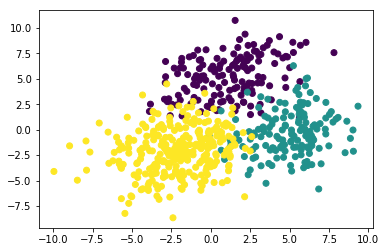

In [67]:
# We will use the following code to visualize the decision regions of the classifier.
# You don't need to look at this cell.

scatter(trainingdata[:,0],trainingdata[:,1],c=traininglabels)
axis('tight')

Use the bayesClassifier function you wrote in Problem 1 along with the trainLDA function from Problem 2 to implement the LDA classifier. Train the LDA classifier on the training data in `trainingdata`, and then run the LDA classifier on the training data and the validation data. Store the predicted training labels in `estimatedtraininglabels` and the predicted labels on the validation data in `estimatedvallabels`. Calculate the corresponding errors. Make sure to display the prior, means and covariance estimated in LDA. Also, run your LDA classifier on the data in `drdata` and store the resultant predicted labels in `drLDA` to help visualize the output of the classifier. <b>(5 points)</b>

In [68]:
# Put your code here
[pi, means, cov] = trainLDA(trainingdata, traininglabels)

print("pi:",pi,"means:",means,"cov:",cov)


estimatedtraininglabels = bayesClassifier(trainingdata, pi, means, cov)
estimatedvallabels = bayesClassifier(valdata, pi, means, cov)

drLDA = bayesClassifier(drdata, pi, means, cov)

pi: [0.25 0.25 0.5 ] means: [[ 1.12191279  5.17315581]
 [ 4.91358665 -0.28614234]
 [-2.07276858 -2.11161245]] cov: [[2.33170513 0.52105323]
 [0.52105323 2.38939057]]


The training data is generated with the distribution used in Problem 1, so your $\pi, \mu, {\sf C}$ should all be pretty close to the ones given in Problem 1. If they are not close, you've done something wrong. 

Report the training error (error of the classifier on the training data) and the validation error (error of the classifier on the validation data). <b>(5 points)</b>

In [69]:
# Put your code here
train_error = classifierError(traininglabels, estimatedtraininglabels)
valid_error = classifierError(vallabels, estimatedvallabels)
print("Training error: ",train_error)
print("Validation error: ",valid_error)

Training error:  0.06833333333333333
Validation error:  0.10833333333333334


#### Answer: training error is 6.833% and validation error is  10.833%

We can also visualize the performance of the classifier on the training and validation data. In this problem, both the training and validation data was generated from the distributions specified in Problem 1, so we show both the LDA classifier (which you learned from the data) and the Bayes classifier (which assumed you knew the true joint distribution of the data and the labels). 

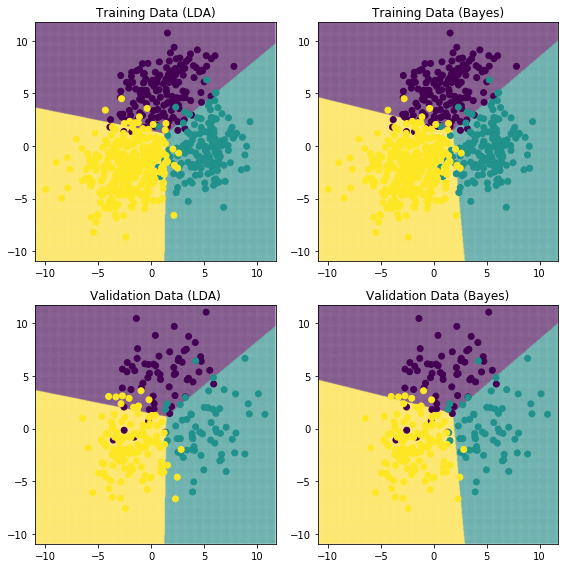

In [33]:
figure(figsize=(8, 8)) # If this is looking a bit squished, you can change the 8 (width) and 8 (height)
subplot(2,2,1)
pcolormesh(xx,yy,drLDA.reshape(xx.shape),alpha=0.1,antialiased=True)
axis('tight')
scatter(trainingdata[:,0],trainingdata[:,1],c=traininglabels)
title('Training Data (LDA)')
subplot(2,2,2)
pcolormesh(xx,yy,drB.reshape(xx.shape),alpha=0.1,antialiased=True)
axis('tight')
scatter(trainingdata[:,0],trainingdata[:,1],c=traininglabels)
title('Training Data (Bayes)')
subplot(2,2,3)
pcolormesh(xx,yy,drLDA.reshape(xx.shape),alpha=0.1,antialiased=True)
axis('tight')
scatter(valdata[:,0],valdata[:,1],c=vallabels)
title('Validation Data (LDA)')
subplot(2,2,4)
pcolormesh(xx,yy,drB.reshape(xx.shape),alpha=0.1,antialiased=True)
axis('tight')
scatter(valdata[:,0],valdata[:,1],c=vallabels)
title('Validation Data (Bayes)')
tight_layout()

Most of the points should be correctly classified in both the training and validation data. If they are not, you've done something wrong. 

In this problem, we see that the LDA classifier gives boundaries which are quite similar to the Bayes classifier (assuming you've implemented both correctly). If you had a lot of training data from an <b>arbitrary distribution</b>, would you expect the LDA classifier to give similar boundaries to the Bayes classifier? Why or Why not? <b>(5 points)</b>

#### Answer: LDA classifiers assume that training data are drawn from a gaussian distribution, so if we have a lot of training data drawn from arbitrary distribution, the classifiers will give similar boundaries if and only if the arbitrary distribution is similar to guassian. Otherwise, the boundaries might be slightly different.

#### Problem 3: k-Nearest Neighbors + Some Short Answer Questions (35 points)

Implement the k-Nearest Neighbors algorithm.

Your function will take:
* Training data feature vectors as a $(N,d)$ numpy.ndarray (trainfeat), where each row is a feature vector
* Training data labels as a length $N$ numpy.ndarray (trainlabel)
* Test data feature vectors as a $(V,d)$ numpy.ndarray (testfeat), where each row is a feature vector
* The value of k

Use the Euclidean distance (scipy.spatial.distance.cdist) as your dissimilarity measure. 

Your function should return a length $V$ numpy.ndarray vector of the estimated labels. This should take around 4 lines of code. Do not use the kNN implementation in scikit-learn or similar.

Some functions which may be useful (read the documentation):
* The numpy.argpartition function can be used to find the $k$ smallest elements of an array (via slicing)
* scipy.stats.mode can find the most common element in an array. 

<b>(10 points)</b>

In [71]:
def kNN(trainfeat,trainlabel,testfeat, k):
    #Put your code here
    dis = dist.cdist(trainfeat,testfeat,"euclidean")
    element = np.argpartition(dis,k,axis = 0)[:k]
    common_ele = stats.mode(trainlabel[element],axis = 0).mode
    return common_ele

Run your k-Nearest Neighbors classifier with the training data in `trainingdata` and validation data in `valdata` from Problem 2, for $k=1,3,4,5$. Compute the training and validation error rates on the data from Problem 2. <b>(5 points)</b>

In [72]:
# Put your code here
k_set = [1,3,4,5]

for k in k_set:
    train_labels = kNN(trainingdata, traininglabels, trainingdata, k)
    training_error = classifierError(train_labels, traininglabels)
    val_labels = kNN(trainingdata, traininglabels, valdata, k)
    validation_error = classifierError(val_labels, vallabels)
    print("k = ",k)
    print("training error:", training_error)
    print("validation error:", validation_error)


k =  1
training error: 0.0
validation error: 0.1125
k =  3
training error: 0.056666666666666664
validation error: 0.10833333333333334
k =  4
training error: 0.06333333333333334
validation error: 0.10833333333333334
k =  5
training error: 0.06
validation error: 0.1


Which value of k would you choose for the k-NN classifier? Why? Run your k-NN classifier with the chosen value of k on  the data in `drdata` and store the result in a variable called `drK`.<b>(5 points)</b>

#### Answer: k = 5 Because knn classifier will have the smallest validation error when k = 5.

In [73]:
# Put your code here
k=5 # Put the value of k you would choose in the variable k.
drK = kNN(trainingdata, traininglabels, drdata, k)

Now, let us visualize the decision boundaries of your chosen value of $k$. 

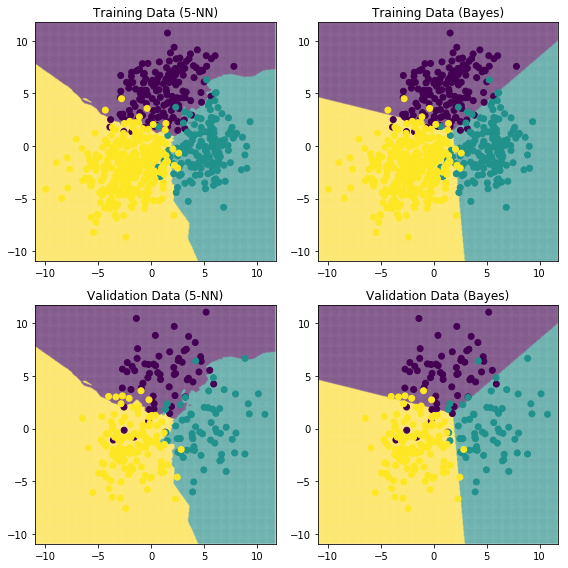

In [74]:
figure(figsize=(8, 8)) # If this is looking a bit squished, you can change the 8 (width) and 8 (height)
subplot(2,2,1)
pcolormesh(xx,yy,drK.reshape(xx.shape),alpha=0.1,antialiased=True)
axis('tight')
scatter(trainingdata[:,0],trainingdata[:,1],c=traininglabels)
title('Training Data (%i-NN)'%k)
subplot(2,2,2)
pcolormesh(xx,yy,drB.reshape(xx.shape),alpha=0.1,antialiased=True)
axis('tight')
scatter(trainingdata[:,0],trainingdata[:,1],c=traininglabels)
title('Training Data (Bayes)')
subplot(2,2,3)
pcolormesh(xx,yy,drK.reshape(xx.shape),alpha=0.1,antialiased=True)
axis('tight')
scatter(valdata[:,0],valdata[:,1],c=vallabels)
title('Validation Data (%i-NN)'%k)
subplot(2,2,4)
pcolormesh(xx,yy,drB.reshape(xx.shape),alpha=0.1,antialiased=True)
axis('tight')
scatter(valdata[:,0],valdata[:,1],c=vallabels)
title('Validation Data (Bayes)')
tight_layout()

**Some Short Answer Questions**

The training and validation data used in problems 1-3 was all drawn from the distribution described in problem 1.  Compare and contrast the results you got from LDA and k-Nearest Neighbors as well as the Bayes classifier from problem 1. Your answer should consider both computational resources as well as error performance. <b>(5 points)</b>

#### Answer: Bayes classifier is the most accurate classifier in this case, but it requires the distribution of the training data to be known, which is difficult for real world data. In addition, Bayes needs more computational resources comparatively. LDA is the next runner-up in terms of accuracy, but assumes Gaussian distribution and needs previous training which estimates the prior distribution. KNN has the highest error but it's the easiest to compute and understand.

Compared to other values of k in k-NN, why the training error is zero when you use the standard nearest neighbor (1-NN) algorithm?  <b>(5 points)</b>

#### Answer: because every data point in the training set will depend on itself only when classifying its label. Thus, it will have zero error.

Assuming you did not have knowledge of the true distribution of the data, out of the classifiers discussed in problems 1-3 (Bayes, LDA, kNN with the k you selected above), which classifier would you prefer in this problem? Why? <b>(5 points)</b>

#### Answer: If we have no knowlegde of the true distribution, Bayes classifier will not work. Also, LDA assumes Gaussian distribution. So I would prefer kNN classifier to classify data in this case.

#### Problem 4: LDA and kNN using scikit-learn <b>(20 points)</b>

In many cases, you will be using other people's libraries to implement learning algorithms. In this problem, you will become familiar with scikit-learn's implementation of LDA and kNN.

First, we will load a data set of digits drawn from zip codes written on US mail. This data set was designed to help get good algorithms to sort mail by zip code automatically. It has been preprocessed a bit, with details given <a href="http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/zip.info.txt">here</a>. Each feature vector consists of $16^2$ real values representing grayscale values of a 16 by 16 image of a digit. The training data has 7291 samples, while the validation data has 2007 samples. Note that this is not the same dataset built into scikit-learn -- it is much larger. 

In [117]:
#Loading the Data

#Read in the Training Data
traindata_tmp= genfromtxt('zip.train', delimiter=' ') 

#The training labels are stored in "trainlabels", training features in "traindata". Rows are feature vectors.
trainlabels=traindata_tmp[:,0]
traindata=traindata_tmp[:,1:]

#Read in the Validation Data
valdata_tmp= genfromtxt('zip.val', delimiter=' ') 

#The validation labels are stored in "vallabels", validation features in "valdata". Rows are feature vectors.
vallabels=valdata_tmp[:,0]
valdata=valdata_tmp[:,1:]

Use scikit-learn's sklearn.neighbors.KNeighborsClassifier to run a Nearest Neighbor classifier (1-NN) on the validation data with the provided training set. Note that KNeighborsClassifier defaults to 5-NN. 

Measure the time for fitting the model and classification (the %timeit feature or time() or similar will be useful). Try the different algorithms possible to fit the model (ball tree, kd-tree and brute force, and specify the fastest one in your code). Make sure to calculate the error on the validation set.  <b>(5 points)</b>

In [123]:
from sklearn import neighbors
# Insert code here
import time
model = ["ball_tree", "kd_tree", "brute"]
for mod in model:
    print('This is ',mod," performance:")
    temp = neighbors.KNeighborsClassifier(n_neighbors=1, algorithm= mod,metric = "euclidean")
    start = time.time()
    temp.fit(traindata, trainlabels)
    
    print("Time to fit data:", time.time()-start)
    start = time.time()
    error = classifierError(vallabels, temp.predict(valdata))
    print("Time to classify data:", time.time()-start)
    print("Error on the validation set:",error )

This is  ball_tree  performance:
Time to fit data: 0.5331790447235107
Time to classify data: 6.819452285766602
Error on the validation set: 0.05630293971101146
This is  kd_tree  performance:
Time to fit data: 0.5177690982818604
Time to classify data: 8.232011556625366
Error on the validation set: 0.05630293971101146
This is  brute  performance:
Time to fit data: 0.015617609024047852
Time to classify data: 0.49569129943847656
Error on the validation set: 0.05630293971101146


#### Anwer: brute force is the fastest
This is  ball_tree  performance:
Time to fit data: 0.5331790447235107
Time to classify data: 6.819452285766602
Error on the validation set: 0.05630293971101146

This is  kd_tree  performance:
Time to fit data: 0.5177690982818604
Time to classify data: 8.232011556625366
Error on the validation set: 0.05630293971101146

This is  brute  performance:
Time to fit data: 0.015617609024047852
Time to classify data: 0.49569129943847656
Error on the validation set: 0.05630293971101146

Now, run LDA on the validation data set with scikit-learn's sklearn.discriminant_analysis.LinearDiscriminantAnalysis class. Measure the training time as well as the time used to classify the validation set. Make sure to calculate the error on the validation set.  <b>(5 points)</b>

In [124]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Insert code here
temp = LinearDiscriminantAnalysis()
start_time = time.time()
temp.fit(traindata, trainlabels)
print("Time to fit data:", time.time()-start)
start_time = time.time()
error = classifierError(vallabels, temp.predict(valdata))
print("Time to classify data:", time.time()-start)
print("Error on the validation set:",error )


Time to fit data: 8.675002813339233
Time to classify data: 8.690619468688965
Error on the validation set: 0.114598903836572


#### Answer: 
Time to fit data: 8.675002813339233
Time to classify data: 8.690619468688965
Error on the validation set: 0.114598903836572

Based on the performance on the validation set, which algorithm would you pick? Your answer should also take into account computational resources required, error on the validation set, and the cost associated with making an error (in real life -- recall the source of the data). <b>(5 points)</b>

#### Answer: I would pick LDA, because it's comparatively faster in classifying the data and has a lower error in terms of classification. The error cost is big when the classification is used for classifying packages or letters. 

Do you think the 0,1-loss is appropriate error measure in this case? Why or why not? How can you use domain-specific knowledge to help improve performance for this application?

If you are interested in this in more detail on this problem, see O. Matan et al., "Reading Handwritten Digits: A ZIP Code Recognition System", IEEE Computer, Vol 25, Number 7, pp 59-63, 1992 (<a href="http://yann.lecun.com/exdb/publis/pdf/matan-92.pdf">tech report version here</a>). You do not need to look at this to answer the question. <b>(5 points)</b>

#### Answer: No, because '32123' and '32122' might be very close compared to '14365' and '96384', so it should be given a lower error. But 0,1 loss will treat these two pairs the same. Instead of the zip code, a bit slower but more accurate way is to look up the city and street first. 

## And this concludes Lab 2! 